# Unsupervised Clustering

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("wine-data/winemag-data-130k-v2.csv", index_col=0)

In [3]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
df = data.drop(columns=["description", "designation", "region_1", "region_2",
                        "taster_name", "taster_twitter_handle", "title"])

In [12]:
df.head()

,country,points,price,province,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Riesling,St. Julian
4,US,87,65.0,Oregon,Pinot Noir,Sweet Cheeks


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 6 columns):
country     129908 non-null object
points      129971 non-null int64
price       120975 non-null float64
province    129908 non-null object
variety     129970 non-null object
winery      129971 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.9+ MB


In [16]:
df.dropna(subset=["country","province", "variety"], inplace=True)

In [18]:
df["price"].fillna(df["price"].median(), inplace=True)

In [24]:
df.sort_values(by=["country"], inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()

df["country"] = labeler.fit_transform(df["country"].astype(str))
df["province"] = labeler.fit_transform(df["province"].astype(str))
df["variety"] = labeler.fit_transform(df["variety"].astype(str))
df["winery"] = labeler.fit_transform(df["winery"].astype(str))

In [27]:
df.head()

,country,points,price,province,variety,winery
90901,0,81,9.0,216,125,10315
122372,0,86,15.0,216,80,1391
122374,0,86,28.0,269,511,11053
4814,0,85,15.0,269,437,2765
4806,0,85,20.0,216,280,5666


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score

In [29]:
k_means = KMeans(n_clusters=3) 
k_means.fit(df) 
cluster_assignments = k_means.predict(df)

In [32]:
print(calinski_harabaz_score(df, cluster_assignments))

519371.76954107784


In [39]:
iter_ch_scores = []
x = range(2,20)

for k in x:
    k_means = KMeans(n_clusters=k) 
    k_means.fit(df) 
    clusters = k_means.predict(df)
    iter_ch_scores.append(calinski_harabaz_score(df, clusters))

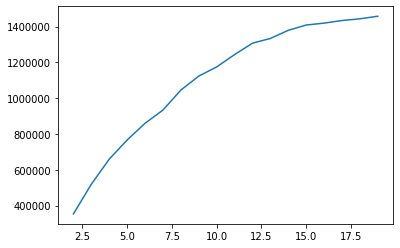

In [40]:
plt.plot(x, iter_ch_scores)

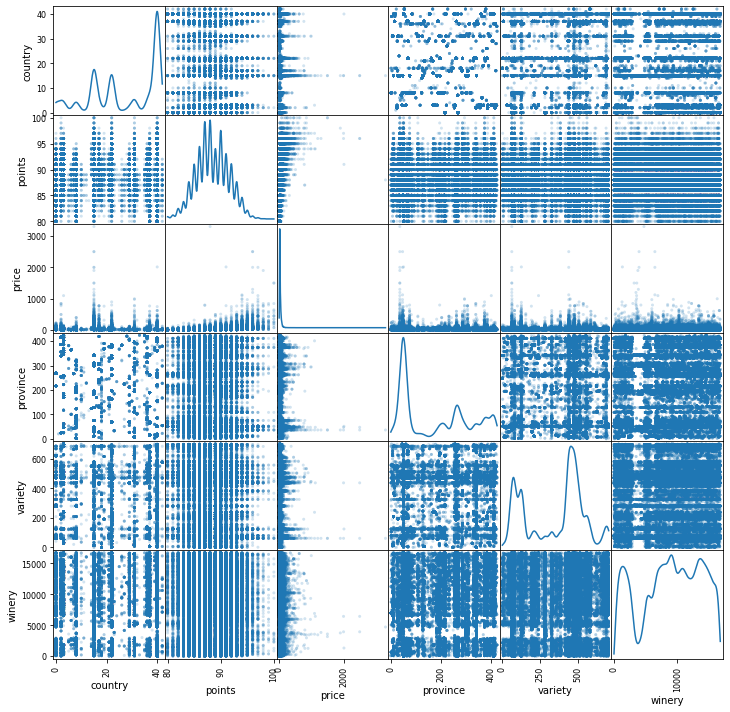

In [43]:
pd.plotting.scatter_matrix(df, alpha=.2, figsize=(12,12), diagonal='kde')
plt.show()